In [194]:
import pandas as pd

In [195]:
df = pd.read_csv('train.csv').drop('Unnamed: 0', axis=1)
df.head()

,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               8000 non-null   object 
 1   clicks                 7727 non-null   float64
 2   likes                  7624 non-null   float64
 3   buys                   8000 non-null   int64  
 4   4xx_errors             8000 non-null   int64  
 5   5xx_errors             8000 non-null   int64  
 6   complaints_count       7527 non-null   object 
 7   average_dwelltime      8000 non-null   float64
 8   source_attractiveness  8000 non-null   float64
 9   date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 625.1+ KB


### Приведение к соответствующим типам данных

In [197]:
df['complaints_count'] = pd.to_numeric(df['complaints_count'], errors='coerce')
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')
df

,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,ecom,6488536.0,NaN,0,82221,0,0.0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,information_source,874840.0,21100.0,0,12872,0,0.0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,information_source,571210.0,94707.0,0,0,7420,0.0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,news,89534.0,924.0,0,834,0,0.0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,information_source,1043953.0,289288.0,0,58375,20260,3948.0,3.764965,0.027303,2024-05-26 11:07:15.950527838
...,...,...,...,...,...,...,...,...,...,...
7995,information_source,1468601.0,474524.0,0,61307,83928,16841.0,4.191481,0.017470,2023-06-20 19:48:01.783634440
7996,information_source,93172.0,6418.0,0,3418,705,0.0,3.745192,-0.019069,2024-07-22 08:45:41.700070757
7997,information_source,82916.0,0.0,0,4302,1718,1007.0,5.837475,-0.061523,2024-06-17 05:44:08.100200436
7998,social,823896.0,105666.0,0,0,2892,267.0,11.994037,0.131620,2023-06-11 02:53:14.377302808


### Анализ датасета

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df.describe()

,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness
count,7.727000e+03,7.624000e+03,8.000000e+03,8.000000e+03,8.000000e+03,7116.000000,8000.000000,8000.000000
mean,2.749785e+06,5.985027e+05,5.810509e+05,8.204958e+04,2.769224e+04,6418.338252,6.979549,0.191997
std,4.699120e+06,1.978345e+06,2.262221e+06,1.555219e+05,7.946935e+04,16082.069321,10.004924,0.227873
min,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.000000,-0.681718
25%,3.599210e+05,0.000000e+00,0.000000e+00,2.943000e+03,0.000000e+00,144.500000,1.503928,0.038220
50%,1.097221e+06,3.399550e+04,0.000000e+00,2.671750e+04,0.000000e+00,1393.000000,4.022802,0.154256
75%,2.915358e+06,2.860638e+05,0.000000e+00,9.500225e+04,2.016375e+04,5099.750000,8.899400,0.282510
max,6.203206e+07,5.582181e+07,4.277391e+07,2.904996e+06,1.865588e+06,402119.000000,211.218066,1.355736


In [200]:
df.corr()

/tmp/ipykernel_405/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness
clicks,1.000000,0.657416,0.611178,0.657965,0.356943,0.402546,0.014896,0.309420
likes,0.657416,1.000000,0.379005,0.187882,0.090815,0.108832,0.025628,0.338398
buys,0.611178,0.379005,1.000000,0.363388,0.174404,0.199452,0.018173,0.520437
4xx_errors,0.657965,0.187882,0.363388,1.000000,0.407281,0.476796,-0.026422,0.100209
5xx_errors,0.356943,0.090815,0.174404,0.407281,1.000000,0.994866,-0.024438,-0.128058
complaints_count,0.402546,0.108832,0.199452,0.476796,0.994866,1.000000,-0.025427,-0.110292
average_dwelltime,0.014896,0.025628,0.018173,-0.026422,-0.024438,-0.025427,1.000000,0.075364
source_attractiveness,0.309420,0.338398,0.520437,0.100209,-0.128058,-0.110292,0.075364,1.000000


/tmp/ipykernel_405/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

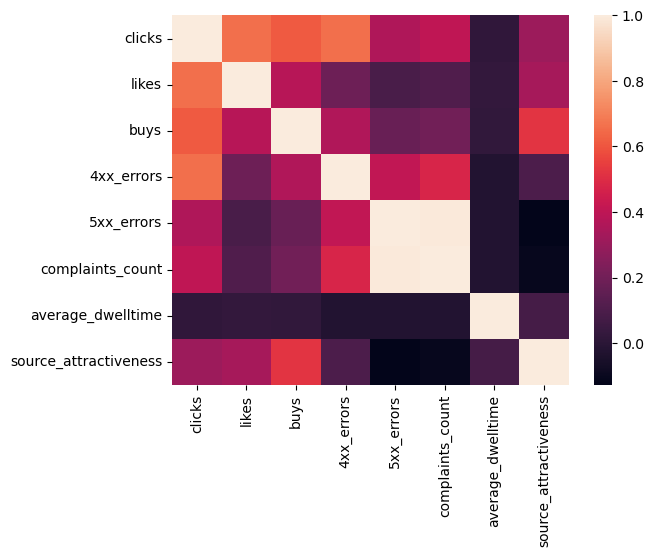

In [201]:
sns.heatmap(df.corr())

In [202]:
numeric = ['clicks', 'likes', 'buys', '4xx_errors',	'5xx_errors', 'complaints_count', 'average_dwelltime']

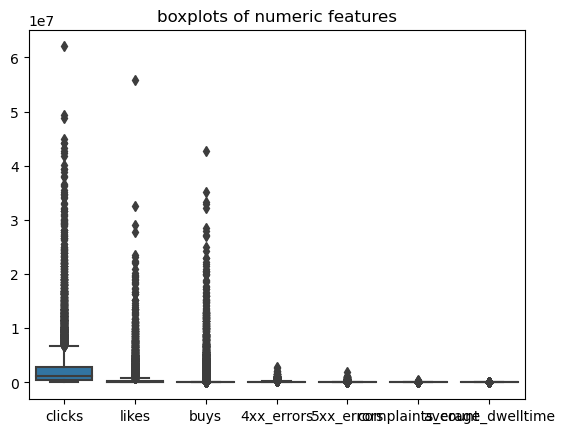

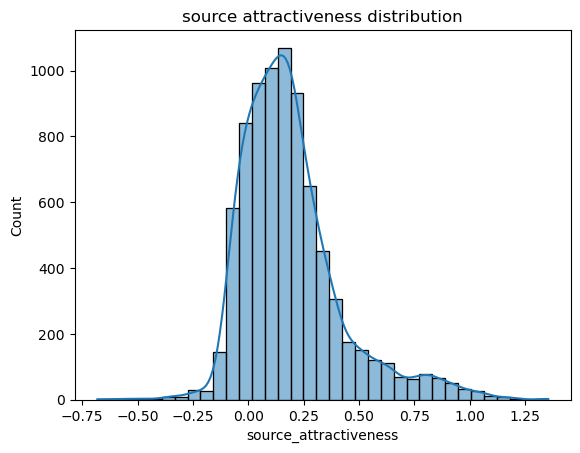

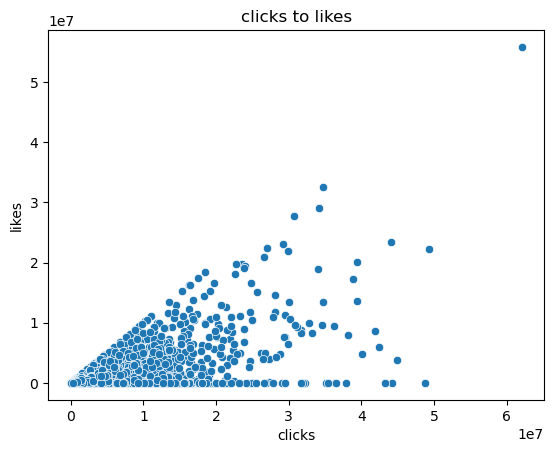

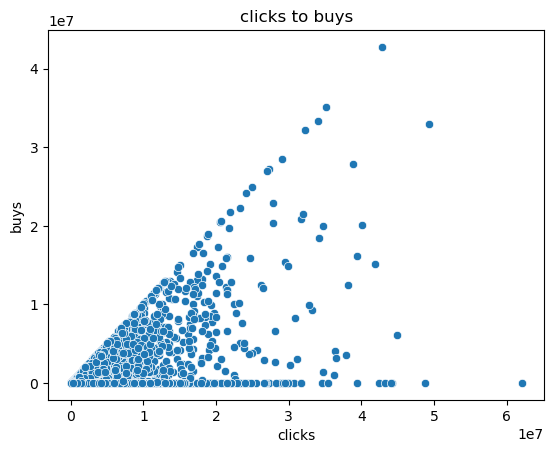

In [203]:
def graphs() -> None:
    sns.boxplot(data=df[numeric])
    plt.title('boxplots of numeric features')
    plt.show()

    sns.histplot(data=df['source_attractiveness'], bins=35, kde=True)
    plt.title('source attractiveness distribution')
    plt.show()

    sns.scatterplot(data=df, x='clicks', y='likes')
    plt.title('clicks to likes')
    plt.show()

    sns.scatterplot(data=df, x='clicks', y='buys')
    plt.title('clicks to buys')
    plt.show()

graphs()

Заполняем отсутствующие данные. TODO: более сложная логика в заполнении clicks и likes

In [204]:
df['complaints_count'].fillna(0, inplace=True)
df['clicks'].fillna(df['clicks'].median(), inplace=True)
df['likes'].fillna(df['likes'].median(), inplace=True)

Убираем выбросы

In [205]:
df = df[df['clicks'] < 6 * 1e7]
df = df[df['likes'] < 4 * 1e7]
df = df[df['buys'] < 4 * 1e7]
df.head()

,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,ecom,6488536.0,33995.5,0,82221,0,0.0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,information_source,874840.0,21100.0,0,12872,0,0.0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,information_source,571210.0,94707.0,0,0,7420,0.0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,news,89534.0,924.0,0,834,0,0.0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,information_source,1043953.0,289288.0,0,58375,20260,3948.0,3.764965,0.027303,2024-05-26 11:07:15.950527838


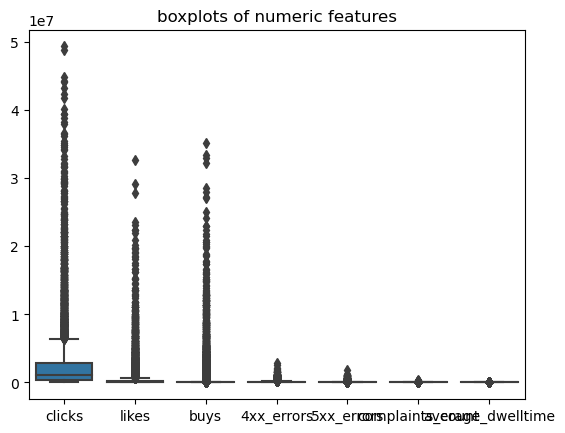

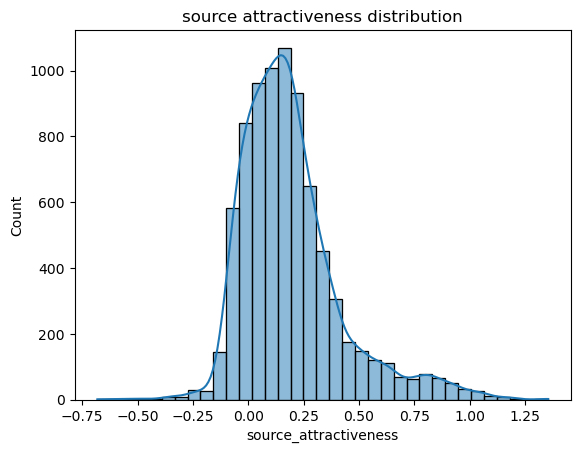

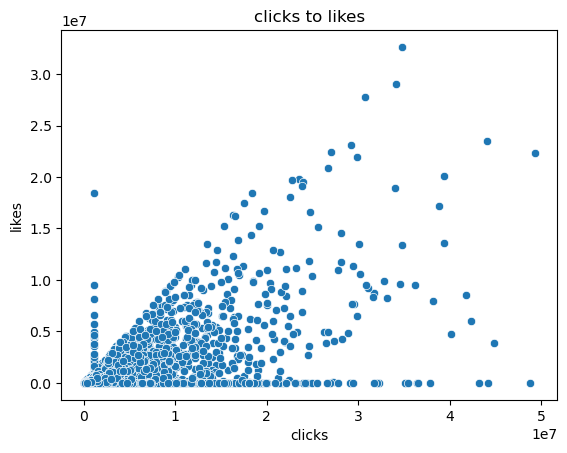

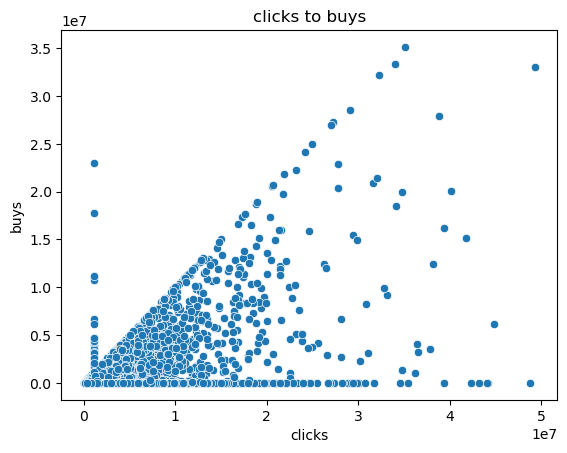

In [206]:
graphs()

Боксплоты clicks, likes, buys показывают, что стоит прологарфмировать данные фичи

Добавим фичи, показывающие зависимости лайков и покупок от кликов, также закодируем категорию

In [207]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    data['complaints_count'] = pd.to_numeric(data['complaints_count'], errors='coerce')
    data['date_of_registration'] = pd.to_datetime(data['date_of_registration'], errors='coerce')
    
    data['complaints_count'].fillna(0, inplace=True)
    data['clicks'].fillna(df['clicks'].median(), inplace=True)
    data['likes'].fillna(df['likes'].median(), inplace=True)
    
    data['domain_age'] = data['domain_age'] = (pd.to_datetime('today') - data['date_of_registration']).dt.days

    data['likes_to_click'] = data['likes'] / (data['clicks'] + 1)
    data['buys_to_click'] = data['buys'] / (data['clicks'] + 1)

    data['log_clicks'] = np.log1p(data['clicks'])
    data['log_likes'] = np.log1p(data['likes'])
    data['log_buys'] = np.log1p(data['buys'])

    data['clicks_buys'] = data['log_clicks'] * data['log_buys']
    data['likes_buys'] = data['log_likes'] * data['log_buys']

    oe = OrdinalEncoder()
    data['category'] = oe.fit_transform(data[['category']])

    return data

df = preprocess(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7998 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   category               7998 non-null   float64       
 1   clicks                 7998 non-null   float64       
 2   likes                  7998 non-null   float64       
 3   buys                   7998 non-null   int64         
 4   4xx_errors             7998 non-null   int64         
 5   5xx_errors             7998 non-null   int64         
 6   complaints_count       7998 non-null   float64       
 7   average_dwelltime      7998 non-null   float64       
 8   source_attractiveness  7998 non-null   float64       
 9   date_of_registration   7998 non-null   datetime64[ns]
 10  domain_age             7998 non-null   int64         
 11  likes_to_click         7998 non-null   float64       
 12  buys_to_click          7998 non-null   float64       
 13  log

In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
model = LinearRegression(fit_intercept=True)

In [210]:
X_train = df.drop(columns=['source_attractiveness', 'date_of_registration'])
y_train = df['source_attractiveness']

model.fit(X_train, y_train)

LinearRegression()

In [211]:
def predict(filepath: str) -> None:
    test = pd.read_csv(filepath)
    test = preprocess(test)
    test.head()

    X_test = test.drop(columns=['ID', 'date_of_registration'])
    predictions = model.predict(X_test)

    data = {
        "source_attractiveness": predictions
    }
    submit = pd.DataFrame(data)

    submit.to_csv('submission.csv', index_label="ID")

predict('test.csv')